# Time Series - Cafelura

In [34]:
%matplotlib inline
import pandas as pd
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

from datetime import date
import calendar

from matplotlib import pyplot as plt
import numpy as np

dados = pd.read_csv('dados/cafelura.csv')
dados['mes'] = pd.to_datetime(dados['mes'])
dados['aumento'] = dados.vendas.diff()
dados['aceleracao'] = dados.aumento.diff()

quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')

dados['vendas_normalizadas']= dados['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values

## Definição das funções

In [27]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    
def plot_comparacao(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc="left")
    sns.lineplot(x=x, y = y1, data=dataset)

    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

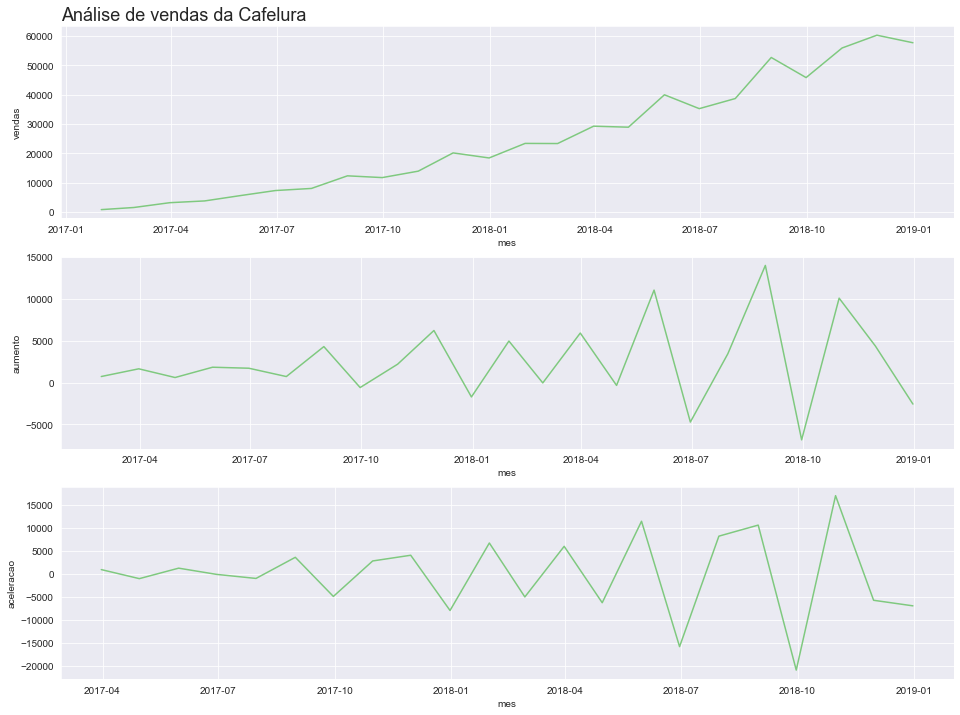

In [28]:
plot_comparacao('Análise de vendas da Cafelura', 'mes', 'vendas', 'aumento', 'aceleracao', dados)

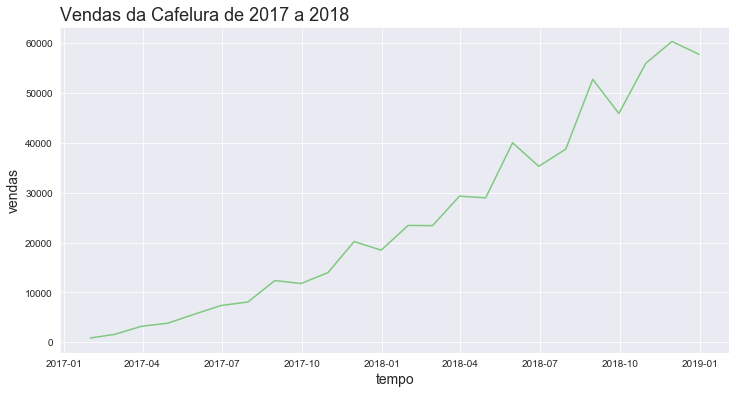

In [29]:
plotar('Vendas da Cafelura de 2017 a 2018', 'tempo', 'vendas', 'mes', 'vendas', dados)

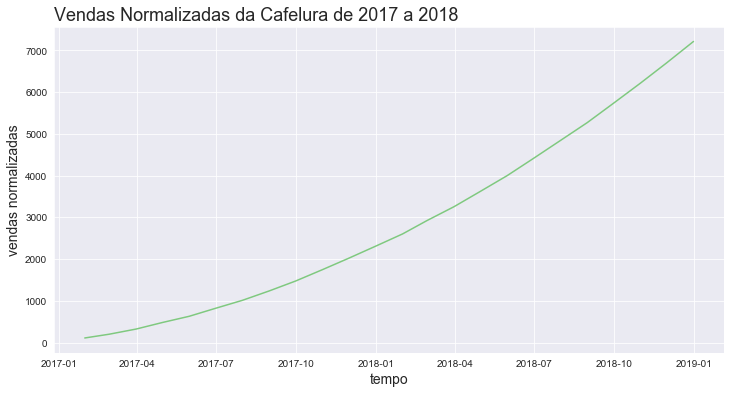

In [30]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'tempo', 'vendas normalizadas', 'mes', 'vendas_normalizadas', dados)

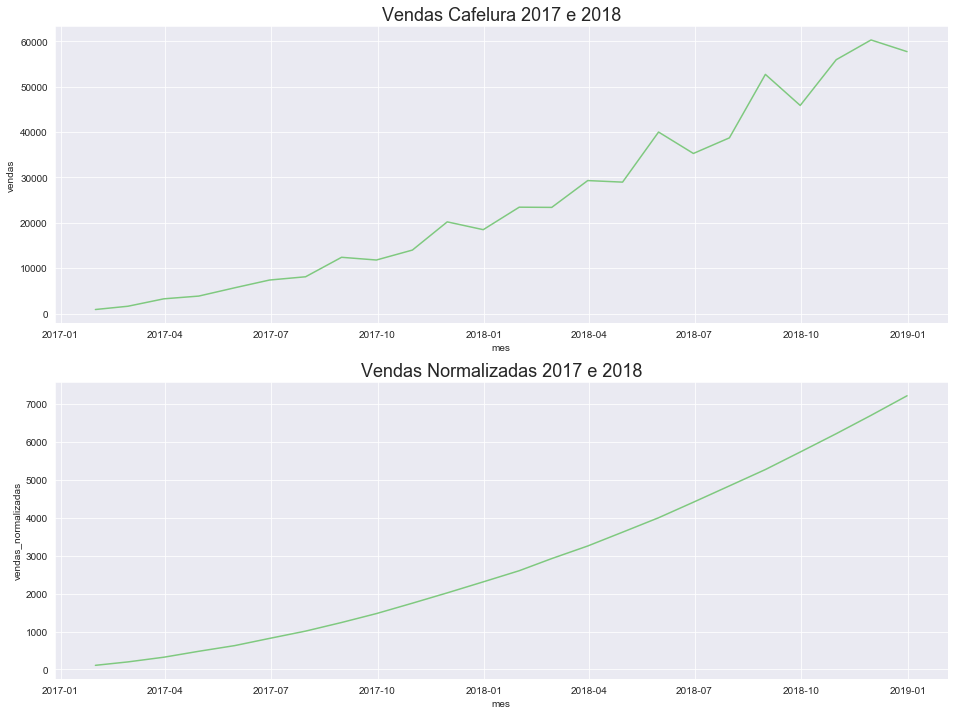

In [31]:
plt.figure(figsize=(16,12))

ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=dados)

ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=dados)

# StatsModels

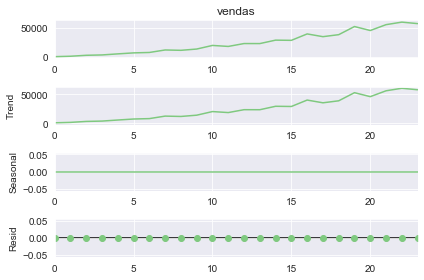

In [59]:
resultado = seasonal_decompose(dados['vendas'], period=1)
ax = resultado.plot()
